<a href="https://colab.research.google.com/github/shubham-hub/marketprophecy/blob/main/Shubham__chavhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import matplotlib.pylab as pylab


import warnings
warnings.filterwarnings("ignore")

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
!pip install keras

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout

In [ ]:
#Importing the 2 datasets
df_train = pd.read_csv(r'D:\Projects\NSE_Training_Data.csv')
df_test = pd.read_csv(r'D:\Projects\NSE_Out_of_Time_Testing_Data.csv')

In [ ]:
df_test = pd.read_csv(r'D:\Projects\NSE_Out_of_Time_Testing_Data.csv')

In [ ]:
#Let's see how our data looks like, and what all features we are having.
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [ ]:
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.15039,17646.65039,17383.30078,17625.69922,17625.69922,200500
1,2022-01-04,17681.40039,17827.59961,17593.55078,17805.25000,17805.25000,247400
2,2022-01-05,17820.09961,17944.69922,17748.84961,17925.25000,17925.25000,251500
3,2022-01-06,17768.50000,17797.94922,17655.55078,17745.90039,17745.90039,236500
4,2022-01-07,17797.59961,17905.00000,17704.55078,17812.69922,17812.69922,239300


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23 non-null     object 
 1   Open       23 non-null     float64
 2   High       23 non-null     float64
 3   Low        23 non-null     float64
 4   Close      23 non-null     float64
 5   Adj Close  23 non-null     float64
 6   Volume     23 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape', df_train. shape)
print('Null Value Present: ', df_train.isnull().values.any())

Dataframe Shape (1481, 7)
Null Value Present:  True


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape', df_test. shape)
print('Null Value Present: ', df_test.isnull().values.any())

Dataframe Shape (23, 7)
Null Value Present:  False


In [ ]:
#percentage of null values is very less so we can drop null values

df_train = df_train.dropna()
df_train = df_train.reset_index(drop = True)

In [ ]:
# Check for duplicate rows.
print('duplicated Value Present: ', df_train.duplicated().values.any())

duplicated Value Present:  False


 The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model.

In [ ]:
print(f'Dataframe contains stock prices between {df_train.Date.min()}  {df_train.Date.max()}')
print(f'Total Days =  {(df_train.Date.max() - df_train.Date.min()).days} days')

Dataframe contains stock prices between 2016-01-04 00:00:00  2021-12-31 00:00:00
Total Days =  2188 days


In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630104,11243.279799,11114.862020,11180.224848,11180.224848,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849610,10816.349610,10718.750000,10769.150390,10769.150390,2.906000e+05
75%,11925.699710,11968.899905,11847.475100,11914.125005,11914.125005,5.092500e+05
max,18602.349610,18604.449220,18445.300780,18477.050780,18477.050780,1.811000e+06


<AxesSubplot:>

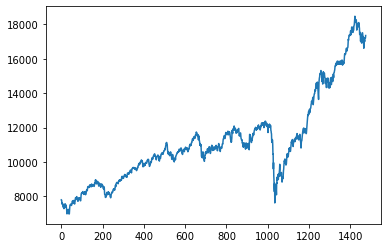

In [ ]:
#Plot the True Adj Close Value
df_train['Adj Close'].plot()

In [ ]:
df_train['Close'] = pd.to_numeric(df_train.Close,errors='coerce') 
df_test['Close'] = pd.to_numeric(df_test.Close,errors='coerce') 


#df_test['Date'] = pd.to_datetime(df_test['Date'])

In [ ]:
#Set Target Variable
trainData = df_train.iloc[:,4:5].values


#Selecting the Features
features = ['Open', 'High', 'Low','Volume']

In [ ]:
testData_1 = df_test.copy()

In [ ]:
testData_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.15039,17646.65039,17383.30078,17625.69922,17625.69922,200500
1,2022-01-04,17681.40039,17827.59961,17593.55078,17805.25000,17805.25000,247400
2,2022-01-05,17820.09961,17944.69922,17748.84961,17925.25000,17925.25000,251500
3,2022-01-06,17768.50000,17797.94922,17655.55078,17745.90039,17745.90039,236500
4,2022-01-07,17797.59961,17905.00000,17704.55078,17812.69922,17812.69922,239300
5,2022-01-10,17913.30078,18017.44922,17879.15039,18003.30078,18003.30078,232400
6,2022-01-11,17997.75000,18081.25000,17964.40039,18055.75000,18055.75000,220200
7,2022-01-12,18170.40039,18227.94922,18128.80078,18212.34961,18212.34961,245000
8,2022-01-13,18257.00000,18272.25000,18163.80078,18257.80078,18257.80078,303700
9,2022-01-14,18185.00000,18286.94922,18119.65039,18255.75000,18255.75000,229500


In [ ]:
x_test = []

y_test = []

for i in range (60,23): #60: timestep // 23: Length of the data
    x_test.append(trainData[i-60:i,0]) 
    x_test.append(trainData [i,0])


x_test,y_test = np.array(x_test), np.array(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler (feature_range=(0,1)) 


In [ ]:
#Scaling
sc = MinMaxScaler (feature_range=(0,1)) 
trainData = sc.fit_transform (trainData) 
trainData.shape

(1475, 1)

In [ ]:
#Scaling
sc = MinMaxScaler (feature_range=(0,1)) 
trainData = sc.fit_transform (testData) 
testData.shape

(23, 1)

In [ ]:
x_train = []

y_train = []

for i in range (60,1475): #60: timestep // 1475: Length of the data
    x_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData [i,0])


x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape [1],1)) #adding the batch_size axis 
x_train.shape

(1415, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape=(x_train.shape[1],1))) 
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True)) 
model.add(Dropout(0.2))

model.add(LSTM(units=108, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
45/45 - 22s - loss: 0.0148 - 22s/epoch - 491ms/step
Epoch 2/20
45/45 - 9s - loss: 0.0027 - 9s/epoch - 195ms/step
Epoch 3/20
45/45 - 9s - loss: 0.0025 - 9s/epoch - 193ms/step
Epoch 4/20
45/45 - 13s - loss: 0.0028 - 13s/epoch - 279ms/step
Epoch 5/20
45/45 - 14s - loss: 0.0020 - 14s/epoch - 320ms/step
Epoch 6/20
45/45 - 11s - loss: 0.0019 - 11s/epoch - 244ms/step
Epoch 7/20
45/45 - 11s - loss: 0.0025 - 11s/epoch - 253ms/step
Epoch 8/20
45/45 - 10s - loss: 0.0022 - 10s/epoch - 217ms/step
Epoch 9/20
45/45 - 9s - loss: 0.0018 - 9s/epoch - 208ms/step
Epoch 10/20
45/45 - 14s - loss: 0.0017 - 14s/epoch - 308ms/step
Epoch 11/20
45/45 - 10s - loss: 0.0016 - 10s/epoch - 220ms/step
Epoch 12/20
45/45 - 9s - loss: 0.0016 - 9s/epoch - 194ms/step
Epoch 13/20
45/45 - 9s - loss: 0.0017 - 9s/epoch - 191ms/step
Epoch 14/20
45/45 - 9s - loss: 0.0014 - 9s/epoch - 202ms/step
Epoch 15/20
45/45 - 9s - loss: 0.0015 - 9s/epoch - 195ms/step
Epoch 16/20
45/45 - 10s - loss: 0.0014 - 10s/epoch - 231ms/step

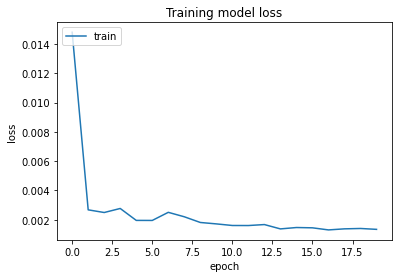

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['train'], loc='upper left')
plt.show()